A bad experience with a driver can result in a profit loss for transport business, especially for those which have a important influence around the world.

This analysis focus on capturing important aspects of Uber drivers to follow customer satisfaction and be able to improve the business

In [3]:
import pandas as pd
import seaborn as sb
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\PC\Desktop\data_analysis-portfolio\datasets\ncr_ride_bookings.csv")



In [5]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


#### General overview

In [6]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


#### We can take the unknown reviews made by customers to see the problem.

In [7]:
null_reviews = df[df['Driver Ratings'].isnull()].count()
null_reviews["Vehicle Type"]

np.int64(57000)

#### Now we check all the ratings grouped by vehicle type.

#### We can find there aren`t beneficial for the business cause the average rating is 4.23
#### What's the reason?


In [ ]:
vehicles_ratings =df.groupby("Vehicle Type")["Driver Ratings"].mean()
vehicles_ratings
print("Most Ubers rides were rated with a score of:", vehicles_ratings.mode())

Most Ubers rides were rated with a score of: 0    4.225614
1    4.227694
2    4.230056
3    4.231812
4    4.232369
5    4.234865
6    4.238340
Name: Driver Ratings, dtype: float64


In [9]:
print("Average rating: " + str(vehicles_ratings.mean()))

Average rating: 4.2315357203573765


<Axes: xlabel='Vehicle Type', ylabel='Driver Ratings'>

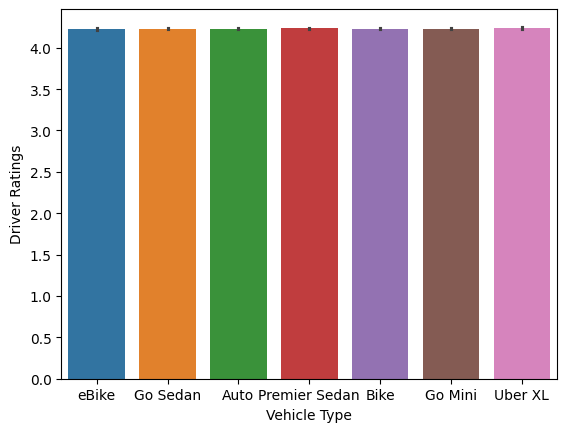

In [31]:
sb.barplot(data=df, x='Vehicle Type',y="Driver Ratings", hue='Vehicle Type')

#### We can analyze the reason of rides being cancelled

In [45]:
#Total number of cancelled rides.
cancelled_rides = df["Cancelled Rides by Customer"].count() + df["Cancelled Rides by Driver"].count()
cancelled_rides

np.int64(37500)

In [22]:
groupded_cancellations = df.groupby('Driver Cancellation Reason')["Driver Cancellation Reason"].count()
print(groupded_cancellations)
print("Total number of cancelled rides:", cancelled_rides)

Driver Cancellation Reason
Customer related issue                 6837
More than permitted people in there    6686
Personal & Car related issues          6726
The customer was coughing/sick         6751
Name: Driver Cancellation Reason, dtype: int64
Total number of cancelled rides: 37500


We find the most prominent reason is because of customers issues.

#### Now let's see the number of completed rides

In [ ]:
df_no_cancel = df[df["Booking Status"] == "Completed"].count()
print(df_no_cancel)

Date                                 93000
Time                                 93000
Booking ID                           93000
Booking Status                       93000
Customer ID                          93000
Vehicle Type                         93000
Pickup Location                      93000
Drop Location                        93000
Avg VTAT                             93000
Avg CTAT                             93000
Cancelled Rides by Customer              0
Reason for cancelling by Customer        0
Cancelled Rides by Driver                0
Driver Cancellation Reason           93000
Incomplete Rides                         0
Incomplete Rides Reason                  0
Booking Value                        93000
Ride Distance                        93000
Driver Ratings                       93000
Customer Rating                      93000
Payment Method                       93000
dtype: int64


#### We perform an operation to get the total number of completed rides

In [57]:
total_completed_rides = df_no_cancel - cancelled_rides
print("Total number of completed rides:", total_completed_rides.count())

Total number of completed rides: 21


#### If the booking value is very expensive, it can have an influence on uber ratings.

#### Let's find out if its true

<Axes: xlabel='Booking Value', ylabel='Driver Ratings'>

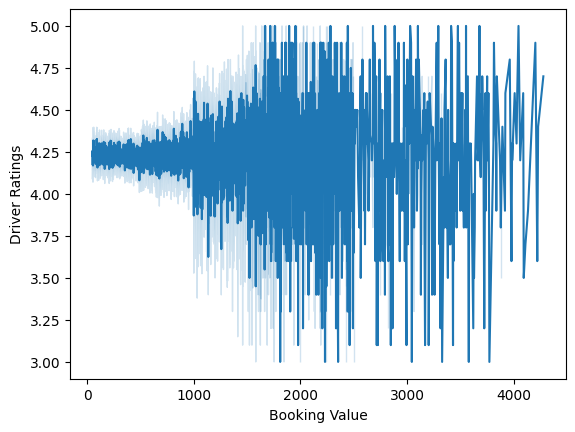